In [1]:
from numpy import *
from numpy.random import *
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from PlotFuncs import *
from LabFuncs import *
from Params import *
from HaloFuncs import *
from scipy.stats import norm
import pandas
import cmocean
from copy import copy


df = pandas.read_csv('../data/Gaia-SDSS.csv')
df_S = pandas.read_csv('../data/GAIA_SDSS_Shards.csv')
names = df_S.group_id.unique()

In [2]:
# Fit data to three component halo
means_init = zeros(shape=(3,4))
means_init[0,:] = array([0.0,0.0,0.0,-1.4]) # Sausage
means_init[1,:] = array([0.0,0.0,0.0,-2.0]) # Halo
means_init[2,:] = array([0.0,126.0,0.0,-1.8]) # Halo
weights_init = array([0.5,0.34,0.16])
covariance_type = 'full'
data = array([df.GalRVel,df.GalphiVel,df.GalzVel,df.feh]).T
clf = mixture.GaussianMixture(n_components=3, covariance_type=covariance_type,
                              weights_init=weights_init,means_init=means_init,tol=1e-12,reg_covar=1e-8,max_iter=1000)
clf.fit(data)
Ps = clf.predict_proba(data)
meens = clf.means_
covs = clf.covariances_
ws = clf.weights_
eta = ws[0]

Ps = clf.predict_proba(data)
imod = argmax(Ps,axis=1)
df1 = df.loc[imod==0]
df2 = df.loc[imod==1]
df3 = df.loc[imod==2]

print("Sausage")
print("%.2f ± %.2f" % (meens[0,0],sqrt(covs[0,0,0])))
print("%.2f ± %.2f" % (meens[0,1],sqrt(covs[0,1,1])))
print("%.2f ± %.2f" % (meens[0,2],sqrt(covs[0,2,2])))
print("%.2f ± %.2f" % (meens[0,3],sqrt(covs[0,3,3])))
print(sqrt(covs[0,:,:]*(covs[0,:,:]>.0)))

print("")
print("Halo")
print("%.2f ± %.2f" % (meens[1,0],sqrt(covs[1,0,0])))
print("%.2f ± %.2f" % (meens[1,1],sqrt(covs[1,1,1])))
print("%.2f ± %.2f" % (meens[1,2],sqrt(covs[1,2,2])))
print("%.2f ± %.2f" % (meens[1,3],sqrt(covs[1,3,3])))
print(sqrt(covs[1,:,:]*(covs[1,:,:]>.0)))

print("")
print("Disk")
print("%.2f ± %.2f" % (meens[2,0],sqrt(covs[2,0,0])))
print("%.2f ± %.2f" % (meens[2,1],sqrt(covs[2,1,1])))
print("%.2f ± %.2f" % (meens[2,2],sqrt(covs[2,2,2])))
print("%.2f ± %.2f" % (meens[2,3],sqrt(covs[2,3,3])))
print(sqrt(covs[2,:,:]*(covs[2,:,:]>.0)))


# # For copying into latex document

# sigrp1 = covs[0,0,1]/sqrt(covs[0,1,1]*covs[0,0,0])
# sigrp2 = covs[1,0,1]/sqrt(covs[1,1,1]*covs[1,0,0])
# sigrp3 = covs[2,0,1]/sqrt(covs[2,1,1]*covs[2,0,0])

# sigrz1 = covs[0,0,2]/sqrt(covs[0,2,2]*covs[0,0,0])
# sigrz2 = covs[1,0,2]/sqrt(covs[1,2,2]*covs[1,0,0])
# sigrz3 = covs[2,0,2]/sqrt(covs[2,2,2]*covs[2,0,0])

# sigpz1 = covs[0,1,2]/sqrt(covs[0,1,1]*covs[0,2,2])
# sigpz2 = covs[1,1,2]/sqrt(covs[1,1,1]*covs[1,2,2])
# sigpz3 = covs[2,1,2]/sqrt(covs[2,1,1]*covs[2,2,2])

# print(r"$\bar{v}_r[{\rm km\,s}^{-1}]$ & $%.1f \pm %.1f$ & $%.1f \pm %.1f$ & $%.1f \pm %.1f$ \\" % (meens[1,0],sqrt(covs[1,0,0]),meens[0,0],sqrt(covs[0,0,0]),meens[2,0],sqrt(covs[2,0,0])))
# print(r"$\bar{v}_\phi[{\rm km\,s}^{-1}]$ & $%.1f \pm %.1f$ & $%.1f \pm %.1f$ & $%.1f \pm %.1f$ \\" % (meens[1,1],sqrt(covs[1,1,1]),meens[0,1],sqrt(covs[0,1,1]),meens[2,1],sqrt(covs[2,1,1])))
# print(r"$\bar{v}_z[{\rm km\,s}^{-1}]$ & $%.1f \pm %.1f$ & $%.2f \pm %.1f$ & $%.1f \pm %.1f$ \\" % (meens[1,2],sqrt(covs[1,2,2]),meens[0,2],sqrt(covs[0,2,2]),meens[2,2],sqrt(covs[2,2,2])))
# print(r"$\overline{\rm [Fe/H]}$ & $%.1f \pm %.1f$ & $%.1f \pm %.1f$ & $%.1f \pm %.1f$ \\" % (meens[1,3],sqrt(covs[1,3,3]),meens[0,3],sqrt(covs[0,3,3]),meens[2,3],sqrt(covs[2,3,3])))
# print(r"$\Sigma_{r\phi}/\sigma_r\sigma_\phi$ & $%.1f$ & $%.1f$ & $%.1f$ \\"%(sigrp2,sigrp1,sigrp3))
# print(r"$\Sigma_{rz}/\sigma_r\sigma_z$ & $%.1f$ & $%.1f$ & $%.1f$ \\"%(sigrz2,sigrz1,sigrz3))
# print(r"$\Sigma_{\phi z}/\sigma_\phi\sigma_z$ & $%.1f$ & $%.1f$ & $%.1f$ \\"%(sigpz2,sigpz1,sigpz3))
# print(r"$w$ & $%.2f$ & $%.2f$ & $%.2f$ \\"%(ws[1],ws[0],ws[2]))


Sausage
-8.17 ± 158.93
25.72 ± 61.50
0.99 ± 80.86
-1.39 ± 0.23
[[158.9321944   -0.          61.64548034   0.64040092]
 [ -0.          61.50275584  -0.          -0.        ]
 [ 61.64548034  -0.          80.86372577   0.47118518]
 [  0.64040092  -0.           0.47118518   0.23117558]]

Halo
-0.06 ± 144.44
5.97 ± 120.03
8.03 ± 115.67
-1.90 ± 0.40
[[144.4425424   -0.          39.30495438   1.26824418]
 [ -0.         120.0319477   -0.          -0.        ]
 [ 39.30495438  -0.         115.66972623   1.30480984]
 [  1.26824418  -0.           1.30480984   0.39917567]]

Disk
12.37 ± 76.75
128.78 ± 50.13
3.57 ± 62.69
-1.67 ± 0.27
[[76.75066005 10.36018696 30.12014712 -0.        ]
 [10.36018696 50.12566478 -0.          1.2426654 ]
 [30.12014712 -0.         62.69161245  0.14148505]
 [-0.          1.2426654   0.14148505  0.27144352]]
$\bar{v}_r[{\rm km\,s}^{-1}]$ & $-0.1 \pm 144.4$ & $-8.2 \pm 158.9$ & $12.4 \pm 76.8$ \\
$\bar{v}_\phi[{\rm km\,s}^{-1}]$ & $6.0 \pm 120.0$ & $25.7 \pm 61.5$ & $128.8 

/Users/ciaranohare/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  """

/Users/ciaranohare/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:7: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  import sys

/Users/ciaranohare/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:8: VisibleDeprecationWarning: Passing `norm

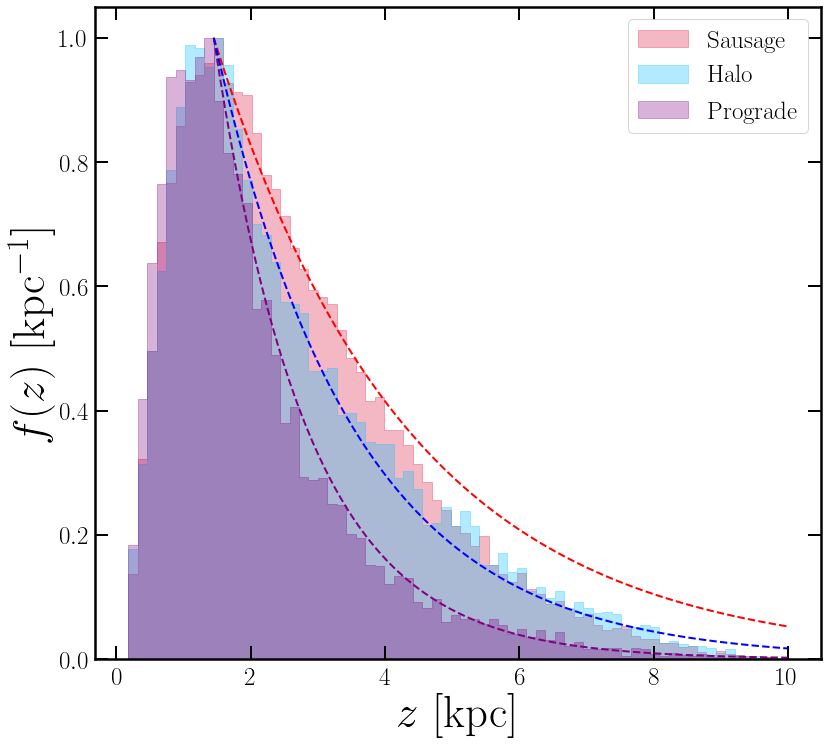

In [4]:
xlab1 = r'$z$ [kpc]'
ylab1 = r'$f(z)$ [kpc$^{-1}$]'
fig,ax1 = MySquarePlot(xlab1,ylab1)

h3,zb = histogram(abs(df3.GalRecZ).values,bins='fd',normed=True)
zc = (zb[1:]+zb[0:-1])/2.0
h2,_ = histogram(abs(df2.GalRecZ).values,bins=zb,normed=True)
h1,_ = histogram(abs(df1.GalRecZ).values,bins=zb,normed=True)

plt.fill_between(zc,h1/amax(h1),color='crimson',alpha=0.3,step='pre',label='Sausage')
plt.fill_between(zc,h2/amax(h2),color='deepskyblue',alpha=0.3,step='pre',label='Halo')
plt.fill_between(zc,h3/amax(h3),color='purple',alpha=0.3,step='pre',label='Prograde')

z0 = zc[argmax(h3)]
zz = linspace(z0,10,100)
R = 8.0
rho3 = exp(-abs(zz-z0)/1.4)
rho2 = exp(-abs(zz-z0)/2.1)
rho1 = exp(-abs(zz-z0)/2.9)

plt.plot(zz,rho3,'--',lw=2,color='purple')
plt.plot(zz,rho1,'--',lw=2,color='red')
plt.plot(zz,rho2,'--',lw=2,color='blue')


ax1.set_ylim(bottom=0.0)
plt.legend()
plt.show()


/Users/ciaranohare/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:19: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.

/Users/ciaranohare/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:21: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.

/Users/ciaranohare/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:22: VisibleDeprecationWarning: Passing `normed=True` on non-

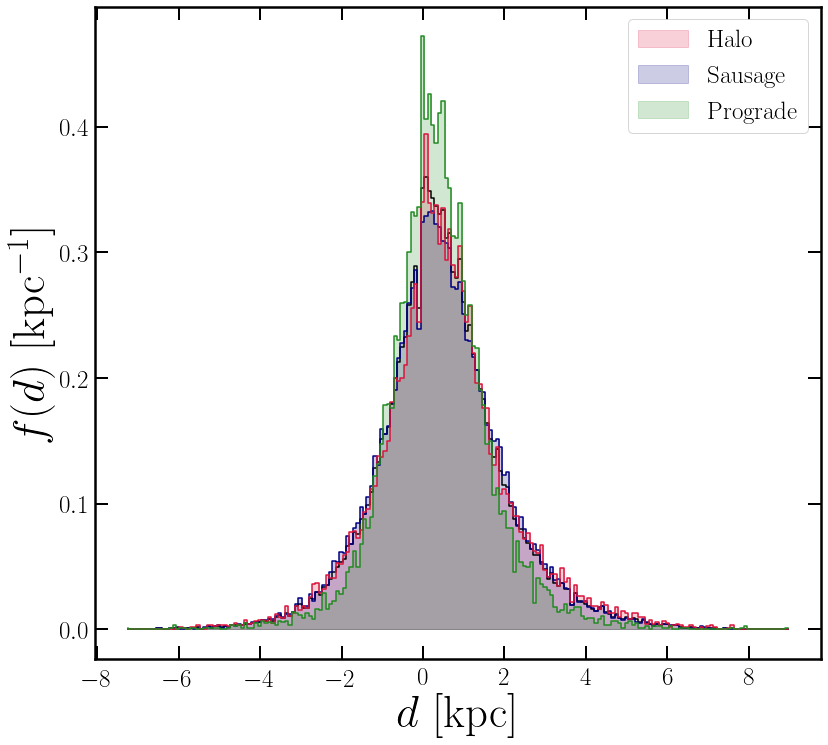

In [49]:
xlab1 = r'$d$ [kpc]'
ylab1 = r'$f(d)$ [kpc$^{-1}$]'
fig,ax1 = MySquarePlot(xlab1,ylab1)

col1 = 'Navy'
col2 = 'Crimson'
col3 = 'ForestGreen'

x0 = array([(df.GalRecX).values,(df.GalRecY).values,(df.GalRecZ).values]).T
x1 = array([(df1.GalRecX).values,(df1.GalRecY).values,(df1.GalRecZ).values]).T
x2 = array([(df2.GalRecX).values,(df2.GalRecY).values,(df2.GalRecZ).values]).T
x3 = array([(df3.GalRecX).values,(df3.GalRecY).values,(df3.GalRecZ).values]).T

d0 = sqrt(sum(x0**2.0,1))
d1 = sqrt(sum(x1**2.0,1))
d2 = sqrt(sum(x2**2.0,1))
d3 = sqrt(sum(x3**2.0,1))

h0,be = histogram(x0[:,1],bins='fd',normed=True)
bc = (be[1:]+be[0:-1])/2.0
h1,_ = histogram(x1[:,1],bins=be,normed=True)
h2,_ = histogram(x2[:,1],bins=be,normed=True)
h3,_ = histogram(x3[:,1],bins=be,normed=True)

plt.fill_between(bc,h2,color=col2,alpha=0.2,step='pre',label='Halo')
plt.fill_between(bc,h1,color=col1,alpha=0.2,step='pre',label='Sausage')
plt.fill_between(bc,h3,color=col3,alpha=0.2,step='pre',label='Prograde')

plt.step(bc,h0,color='k')

plt.step(bc,h1,color=col1)
plt.step(bc,h2,color=col2)
plt.step(bc,h3,color=col3)


#ax1.set_ylim(bottom=0.0)
plt.legend()
plt.show()

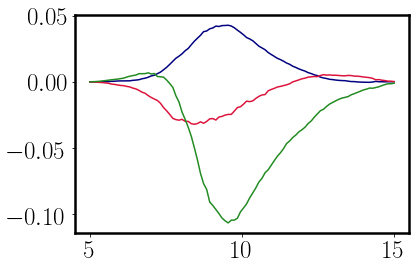

In [46]:
di = linspace(5.0,15.0,100)
cdf0 = interp(di,sort(d0),linspace(0,1.0,size(d0)))
cdf1 = interp(di,sort(d1),linspace(0,1.0,size(d1)))
cdf2 = interp(di,sort(d2),linspace(0,1.0,size(d2)))
cdf3 = interp(di,sort(d3),linspace(0,1.0,size(d3)))


plt.plot(di,cdf0-cdf1,color=col1)
plt.plot(di,cdf0-cdf2,color=col2)
plt.plot(di,cdf0-cdf3,color=col3)


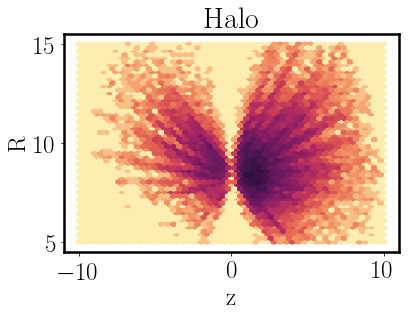

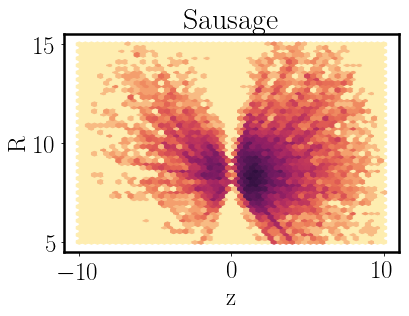

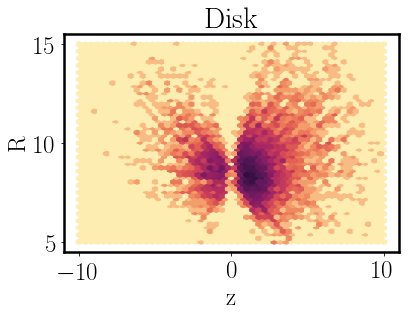

In [62]:

plt.hexbin(abs(x1[:,2]),sqrt(x1[:,0]**2.0+x1[:,1]**2.0),extent=(-10.0,10.0,5.0,15.0),gridsize=50,cmap=cmocean.cm.matter,bins='log')
plt.title('Halo')
plt.xlabel('z')
plt.ylabel('R')
plt.show()

plt.hexbin(abs(x2[:,2]),sqrt(x2[:,0]**2.0+x2[:,1]**2.0),extent=(-10.0,10.0,5.0,15.0),gridsize=50,cmap=cmocean.cm.matter,bins='log')
plt.title('Sausage')
plt.xlabel('z')
plt.ylabel('R')
plt.show()

plt.hexbin(abs(x3[:,2]),sqrt(x3[:,0]**2.0+x3[:,1]**2.0),extent=(-10.0,10.0,5.0,15.0),gridsize=50,cmap=cmocean.cm.matter,bins='log')
plt.title('Disk')
plt.xlabel('z')
plt.ylabel('R')
plt.show()



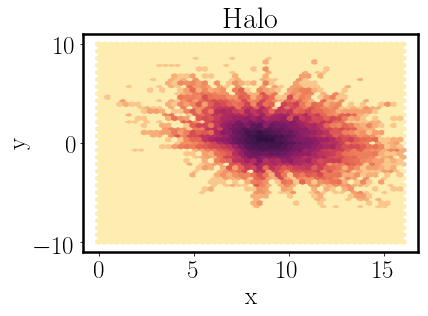

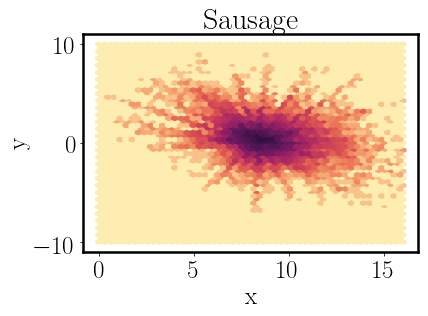

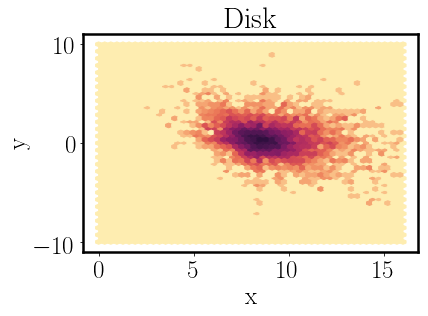

In [64]:
extent = (0.0,16.0,-10.0,10.0)
plt.hexbin(x1[:,0],x1[:,1],extent=extent,gridsize=50,cmap=cmocean.cm.matter,bins='log')
plt.title('Halo')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

plt.hexbin(x2[:,0],x2[:,1],extent=extent,gridsize=50,cmap=cmocean.cm.matter,bins='log')
plt.title('Sausage')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

plt.hexbin(x3[:,0],x3[:,1],extent=extent,gridsize=50,cmap=cmocean.cm.matter,bins='log')
plt.title('Disk')
plt.xlabel('x')
plt.ylabel('y')
plt.show()



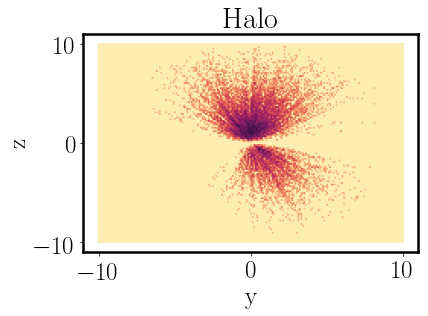

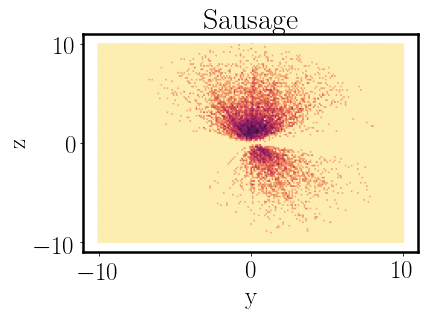

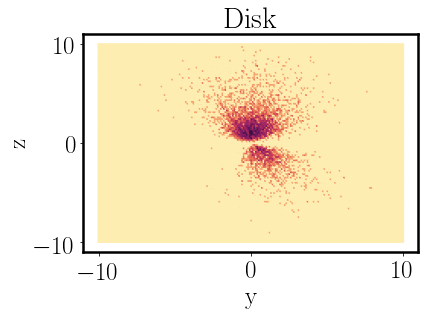

In [68]:
extent = (-10.0,10.0,-10.0,10.0)
plt.hexbin(x1[:,1],x1[:,2],extent=extent,gridsize=200,cmap=cmocean.cm.matter,bins='log')
plt.title('Halo')
plt.xlabel('y')
plt.ylabel('z')
plt.show()

plt.hexbin(x2[:,1],x2[:,2],extent=extent,gridsize=200,cmap=cmocean.cm.matter,bins='log')
plt.title('Sausage')
plt.xlabel('y')
plt.ylabel('z')
plt.show()

plt.hexbin(x3[:,1],x3[:,2],extent=extent,gridsize=200,cmap=cmocean.cm.matter,bins='log')
plt.title('Disk')
plt.xlabel('y')
plt.ylabel('z')
plt.show()
